In [110]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

In [111]:
import warnings
warnings.filterwarnings("ignore")
import sys
seed = 782
np.random.seed(seed)

In [112]:
df = pd.read_csv("digit_train.csv")
train = df.as_matrix()

train_y = train[:30000,0].astype('int8')
train_x = train[:30000,1:].astype('float64')

test_y = train[30000:,0].astype('int8')
test_x = train[30000:,1:].astype('float64')


print("Shape Train Images: (%d,%d)" % train_x.shape)
print("Shape Labels: (%d)" % train_y.shape)
print("Shape Train Images: (%d,%d)" % test_x.shape)
print("Shape Labels: (%d)" % test_y.shape)

Shape Train Images: (30000,784)
Shape Labels: (30000)
Shape Train Images: (12000,784)
Shape Labels: (12000)


In [113]:
# df = pd.read_csv("digit_test.csv")
# test = df.as_matrix().astype('float64')
# print("Shape Test Images: (%d,%d)" % test.shape)

In [114]:
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

In [115]:
# np.random.randint(0,train_x.shape[0],1)[0]

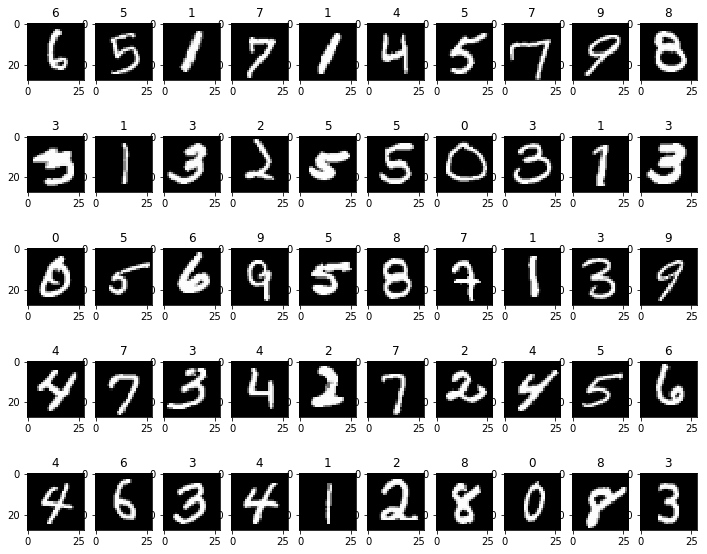

In [116]:
%matplotlib inline
plt.figure(figsize=(12,10))

y, x = 5,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    ni = np.random.randint(0,train_x.shape[0],1)[0]
    show_image(train_x[ni],(28,28), train_y[ni], cmp="gray")
plt.show()

##### COUNT OF EXAMPLES PER DIGIT
Count of number the examples per digit is important, because if the data isn't uniform we might need to apply some treatments. 
In this dataset the number of examples per digit is uniform, so we won't worry.

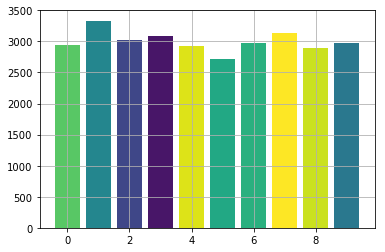

In [117]:
def count_exemple_per_digit(exemples):
    hist = np.ones(10)

    for y in exemples:
        hist[y] += 1

    colors = []
    for i in range(10):
        colors.append(plt.get_cmap('viridis')(np.random.uniform(0.0,1.0,1)[0]))

    bar = plt.bar(np.arange(10), hist, 0.8, color=colors)

    plt.grid()
    plt.show()

count_exemple_per_digit(train_y)

In [118]:
# from sklearn.linear_model import LogisticRegression
# logregressor = LogisticRegression(solver="liblinear", multi_class="ovr")

# train_y = df_labels["label"].as_matrix()  # To get the right vector-like shape call as_matrix on the single column
# train_X = df_images.as_matrix()
# logregressor.fit(train_X, train_y)

In [119]:
# from sklearn.datasets import fetch_mldata

In [120]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier


In [121]:
mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

In [122]:
mlp.fit(train_x/255., train_y)

Iteration 1, loss = 0.42252336
Iteration 2, loss = 0.20234603
Iteration 3, loss = 0.15039413
Iteration 4, loss = 0.12094406
Iteration 5, loss = 0.10276313
Iteration 6, loss = 0.08717562
Iteration 7, loss = 0.07568537
Iteration 8, loss = 0.06519321
Iteration 9, loss = 0.05714971
Iteration 10, loss = 0.05040228


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=10, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=10,
       warm_start=False)

In [123]:
print("Training set score: %f" % mlp.score(train_x, train_y))
print("Test set score: %f" % mlp.score(test_x, test_y))

Training set score: 0.983067
Test set score: 0.959667


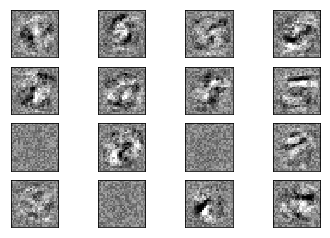

In [124]:
# use below code to reconstruct the learned model 
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [125]:
from sklearn.model_selection import GridSearchCV

df = pd.read_csv("digit_train.csv")
train = df.as_matrix()

param_grid = {
        'hidden_layer_sizes': [(50,)],
        'tol': [1e-2, 1e-3],
        'epsilon': [1e-3, 1e-7, 1e-8, 1e-9, 1e-8]
    }

estimator = GridSearchCV(
        MLPClassifier(learning_rate='constant', learning_rate_init=.1, early_stopping=True, shuffle=True),
        param_grid=param_grid, n_jobs=-1)


# train_y = train[:,0].astype('int8')
# train_x = train[:,1:].astype('float64')

estimator.fit(train_x/255., train_y)


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': [(50,)], 'tol': [0.01, 0.001], 'epsilon': [0.001, 1e-07, 1e-08, 1e-09, 1e-08]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [126]:
print (estimator.score(test_x, test_y))
print (estimator.best_params_ , estimator.best_score_)

0.910083333333
{'hidden_layer_sizes': (50,), 'tol': 0.001, 'epsilon': 0.001} 0.917066666667


In [127]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

pred = estimator.predict(test_x)
accuracy_score(pred,test_y)
confusion_matrix(pred,test_y)


array([[1084,    1,    8,    1,    3,   12,    9,    0,    6,    3],
       [   0, 1331,   24,   42,    3,   49,    3,    4,   32,    9],
       [   6,    3, 1035,   37,   16,    5,   20,   12,   16,    2],
       [   2,    2,   18, 1098,    0,   40,    0,    6,   13,    5],
       [   2,    1,    9,    1, 1068,   12,    8,    6,    7,   54],
       [   0,    1,    0,   41,    0,  866,    2,    1,    7,   17],
       [  19,    0,    5,    1,    7,   40, 1114,    0,    9,    2],
       [  67,    1,   15,    8,    2,    5,    3, 1215,    4,   62],
       [  15,   11,   41,   22,    6,   38,    8,    7, 1067,   16],
       [   0,    1,    2,    7,   35,    9,    0,   17,   13, 1043]])

In [131]:
print(classification_report(pred,test_y))

             precision    recall  f1-score   support

          0       0.91      0.96      0.93      1127
          1       0.98      0.89      0.93      1497
          2       0.89      0.90      0.90      1152
          3       0.87      0.93      0.90      1184
          4       0.94      0.91      0.93      1168
          5       0.80      0.93      0.86       935
          6       0.95      0.93      0.94      1197
          7       0.96      0.88      0.92      1382
          8       0.91      0.87      0.89      1231
          9       0.86      0.93      0.89      1127

avg / total       0.91      0.91      0.91     12000

